**합성곱(Convolution)**
데이터에 도장을 찍어서 유용한 특성만 드러나가 하는 것으로 비유할 수 있다.

밀집층에서는 뉴런마다 입력 개수만큼*합성곱(Convolution)**
데이터에 도장을 찍어서 유용한 특성만 드러나가 하는 것으로 비유할 수 있다.

밀집층에서는 뉴런마다 입력 개수만큼의 가중차가 존재한다. 즉, 모든 입력에 가중치를 곱한다.

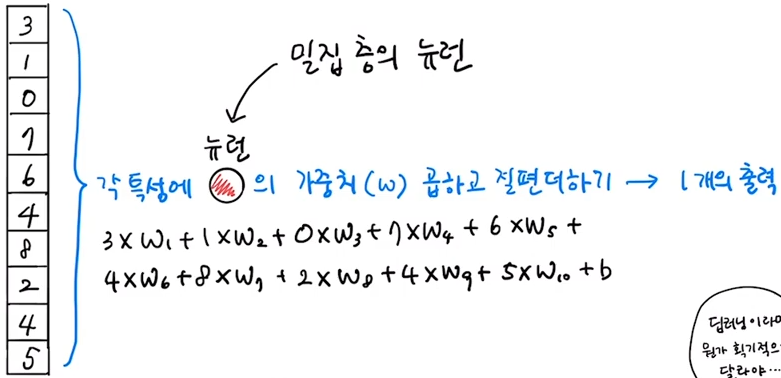

-모델 훈련-

인공신경망은 처음에 가중치 w1 ~ w10과 절편 b를 랜덤하게 초기화한 다음 에포크를 반복하면서 경사 하강법 알고리즘을 통해 손실이 낮아지도록 가중치와 절편을 찾아간다.


합성곱은 밀집층의 계산과 조금 다르다.
입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱하는 방식이다.

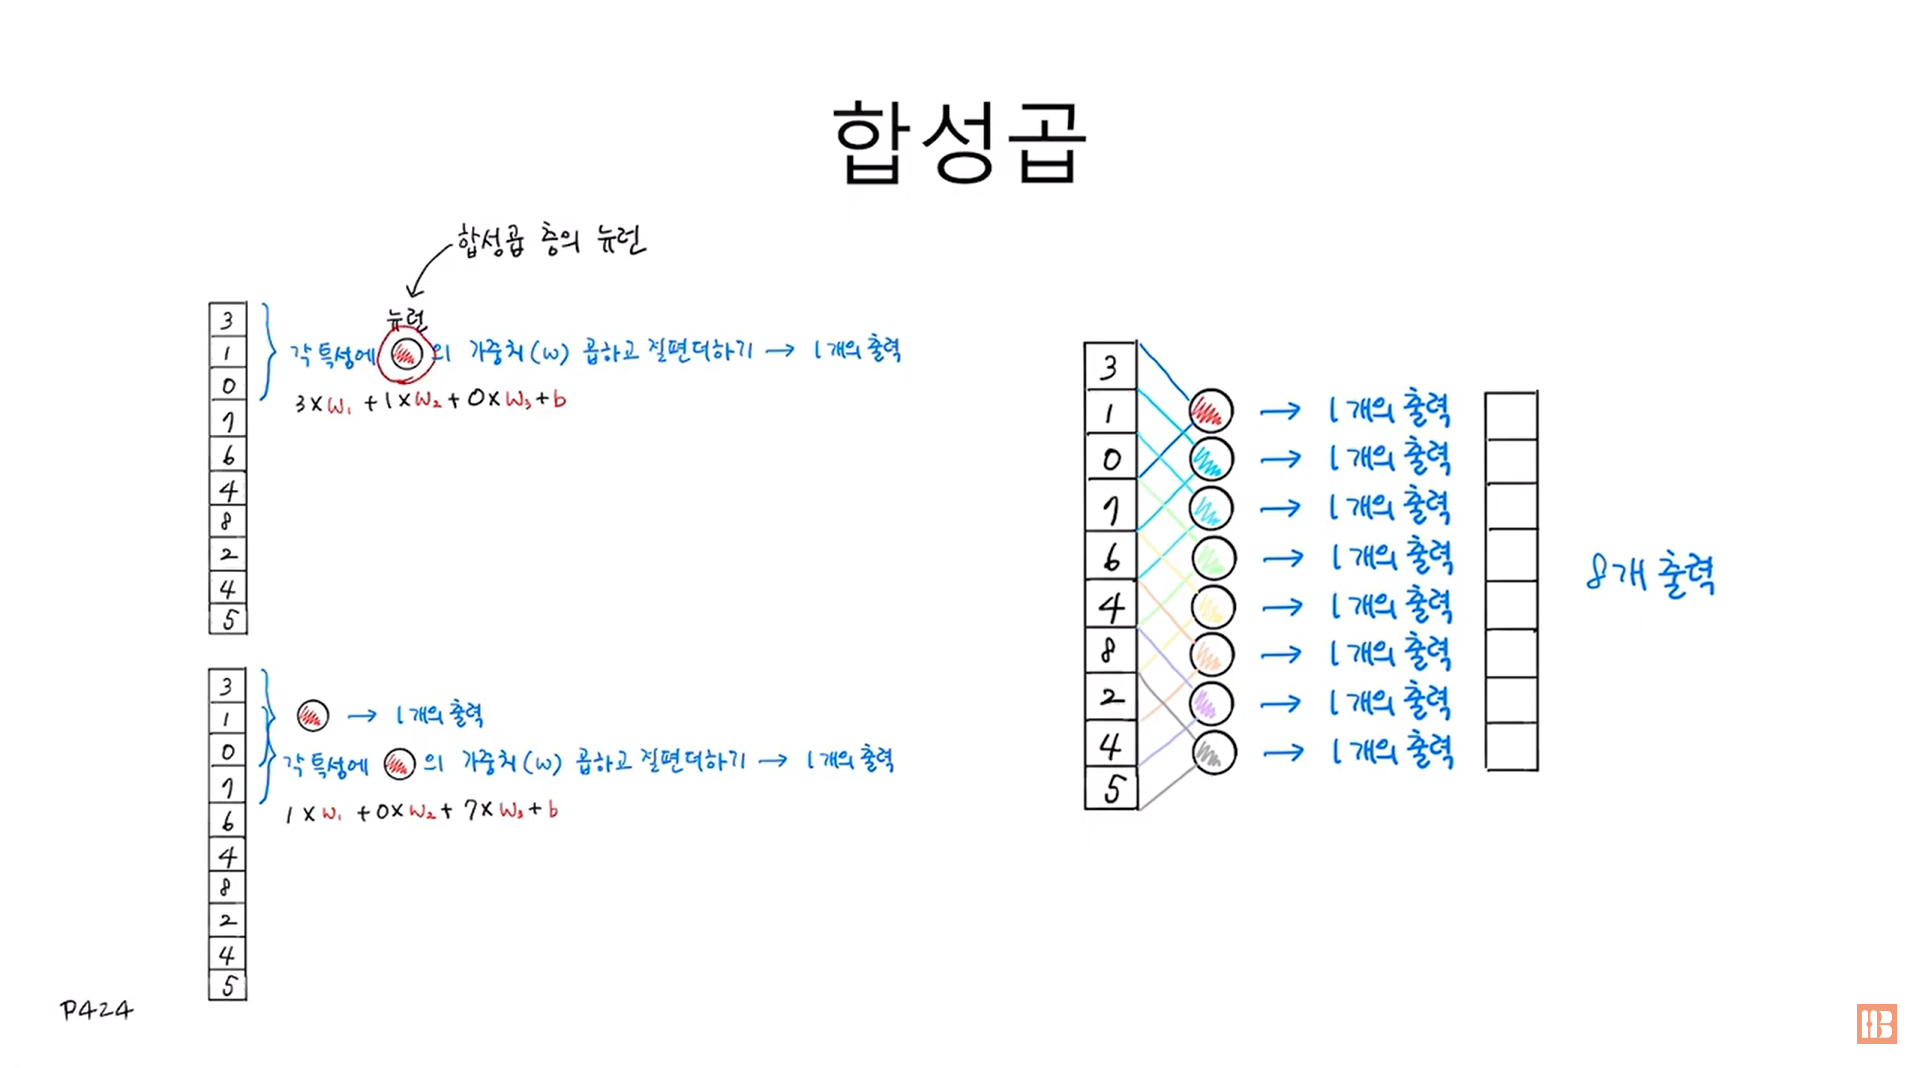

w1 ~ w3을 이용하여 처음 특성과 곱해져 1개의 출력을 만듬. 이 튜런이 한 칸 아래로 이동해 두 번째부터 네 번째 특성과 곱해져 새로운 출력을 만든다.

첫 번째 합성곱에 사용된 가중치 w1 ~ w3과 절편 b 가 두번째 합성곱에서도 동일하게 작동

이 뉴런에는 가중치가 3개이기 때문에 모두 8개의 출력이 만들어짐

밀집층 뉴런 -> 입력 개수만큼 10개의 가중치 -> 1개의 출력

합성곱층 뉴련 -> 3개의 가중치 -> 8개 출력

뉴런의 가중치 개수는 정하기 나름 == 하이퍼퍼라미터

합성곱에서는 뉴런이 입력 위를 이동하면서 출력을 만들기 때문에

합성곱 신경망(CNN)에서는 뉴련을 **필터(filter)** 혹은 **커널(kernel)** 이라고 부른다.

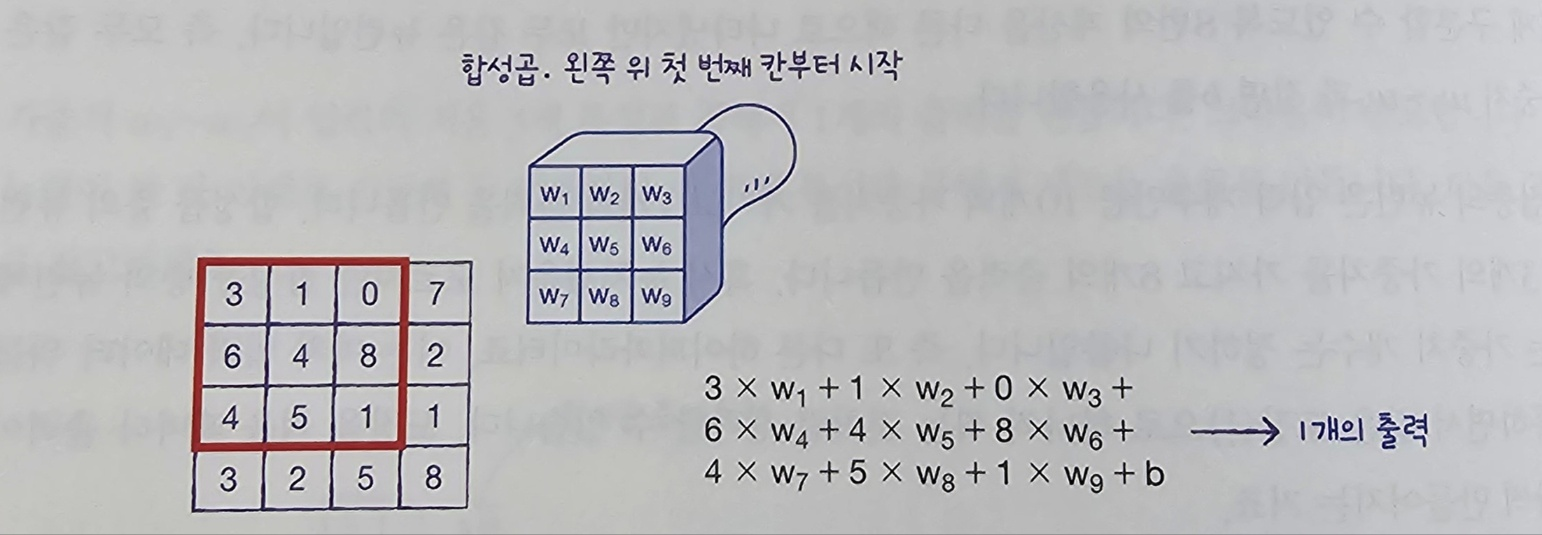

입력이 2차원 배열 -> 도장도 2차원

필터의 커널 크기는 3 x 3(하이퍼파라미터)


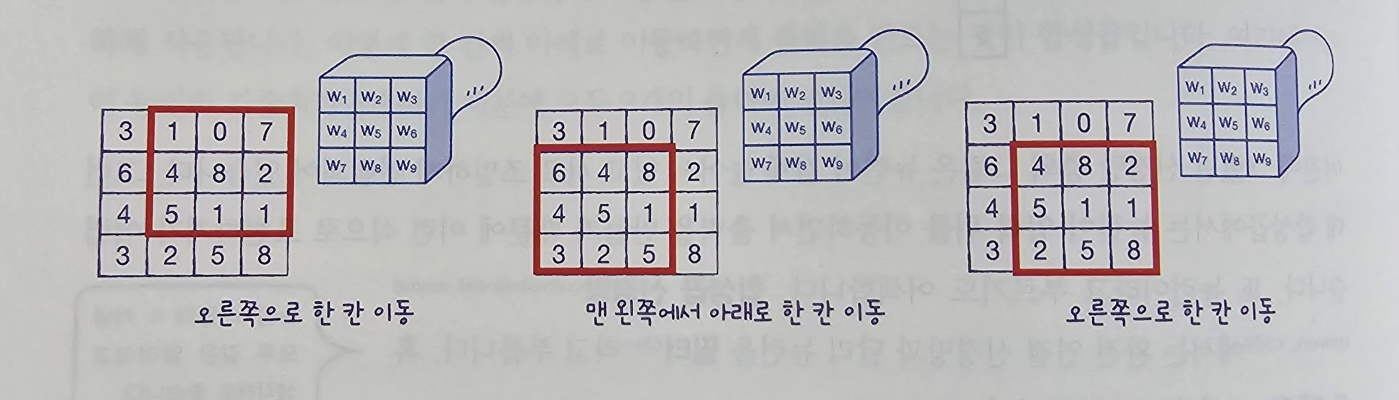

필터가 오른쪽으로 한 칸 이동하여 수행한다.

합성곱은 도장을 찍듯이 왼쪽 위에서 오른쪽 맨 아래까지 이동하며 출력을 만든다.

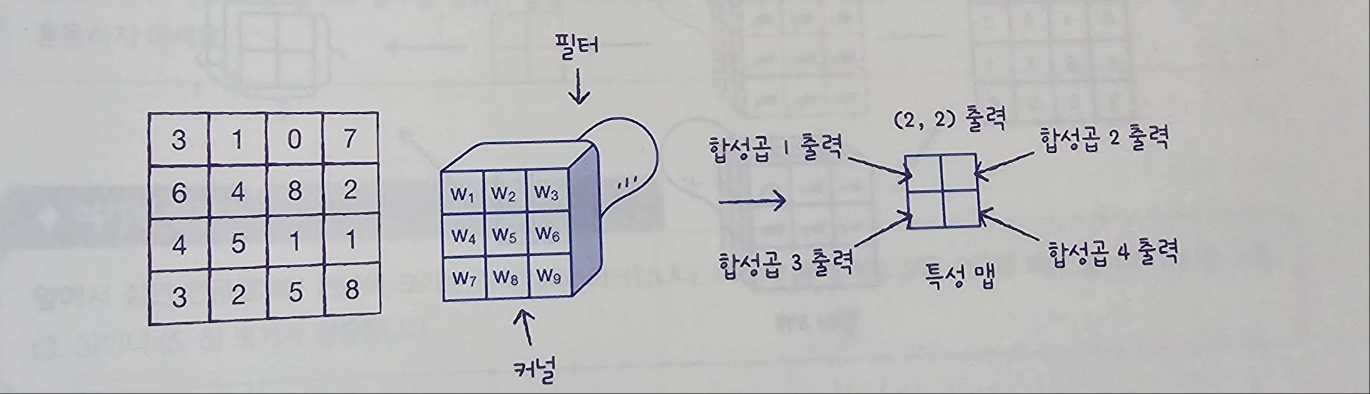

입력과 가중치의 행과 열을 맞추어 곱셈하고 모두 더하는 것이 계산 방법이다.

필터는 모두 4번 이동할 수 있기 때문에 4개의 출력을 만든다.

출력을 2차원으로 표현하면 (4,4) 크기의 입력을 (2,2) 크기로 압축한 것으로 보인다.

합성곱 계산을 통해 얻은 출력을 **특성 맵(feature map)**이라고 한다.

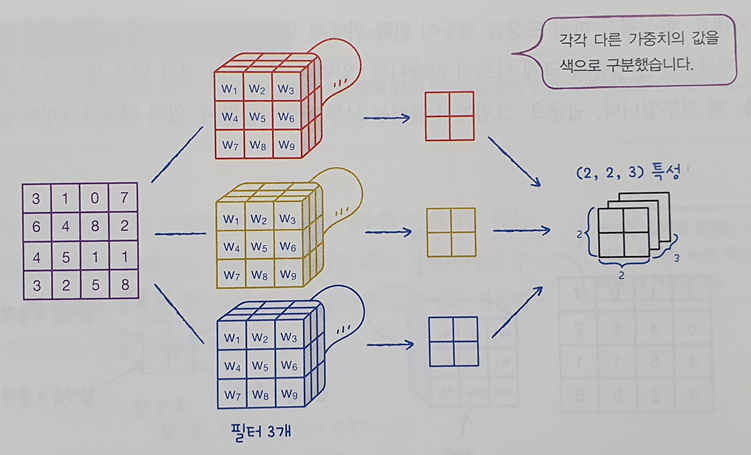

(2,2) 크기의 특성 맵을 쌓으면 3차원 배열이 된다.

위 그림에서는 3개의 필터를 사용했기에 (2,2,3) 크기의 3차원 배열이 된다.

밀집층 뉴런의 가중치가 서로 다르듯이 합성곱 층에 있는 필터의 가중치(커널)도 모두 다르다.



In [1]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')
##Conv2D(필터(도장)의 개수, 커널의 크기, 사용할 활성화 함수)

<Conv2D name=conv2d, built=False>

특성 맵에서는 활성화 함수를 적용하기 후

즉, 일반적으로 특성 맵은 활성화 함수를 통과한 값을 나타냄

합성곱 신경망에서는 활성화 출력을 사용 X

# **패딩과 스트라이트**


*   기존의 계산 (4,4) 에 (3,3) 커널 적용 -> (2,2)크기의 특성맵  
*   (4,4)에 (3,3) 커널 적용 -> (4,4) 방법?



# **패딩**
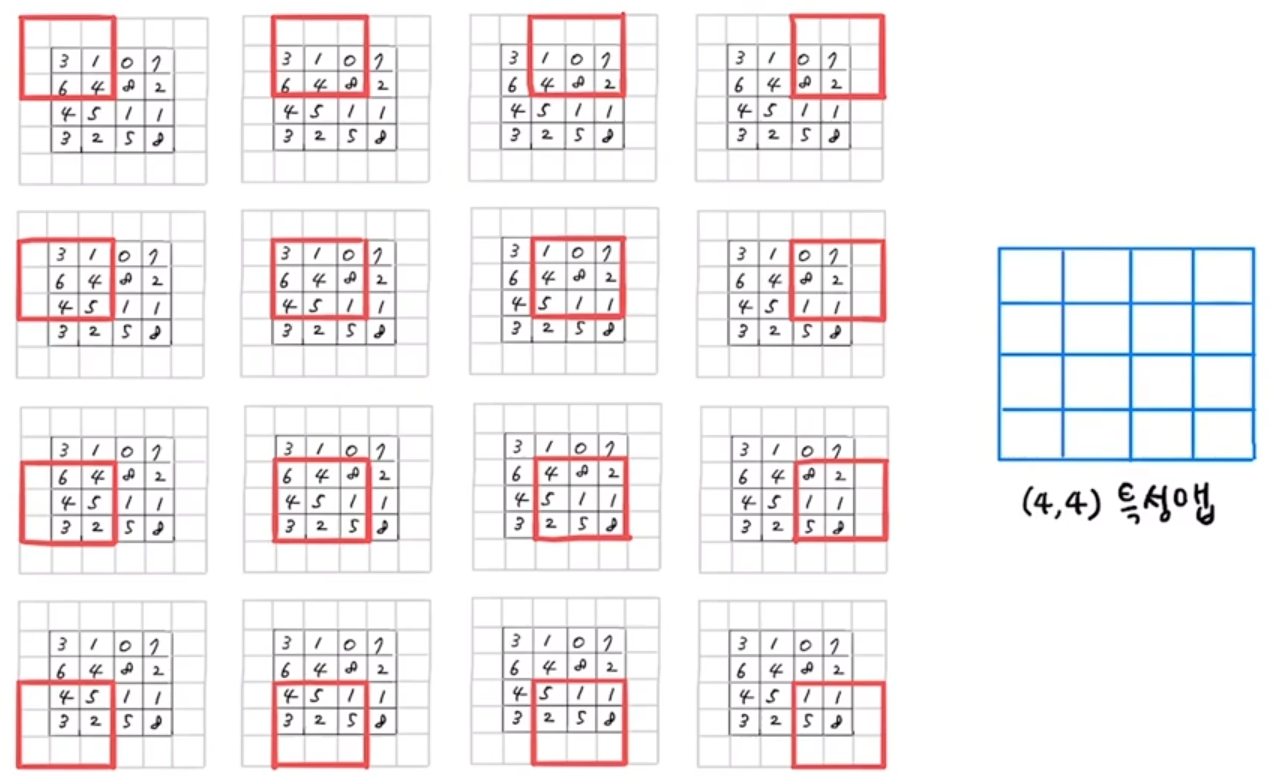

입력 배열의 주위룰 가상의 원소로 채우는 것을 패딩(padding)이라고 한다.

보통은 실제 값이 아니기 때문에 0으로 채운다.

(4,4) 크기의 입력에 0을 1개 패딩하면 (6,6)크기가 된다.

0을 넣으면 실제 계산에는 영향 X


---



입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩 하는 것을 **세임 패딩(same padding)**이라고함

패딩 없이 순수한 입력에서만 합성곱을 하여 특성 맵을 만드는 경우는 **밸리드 패딩(valid padding)**이라고 한다.

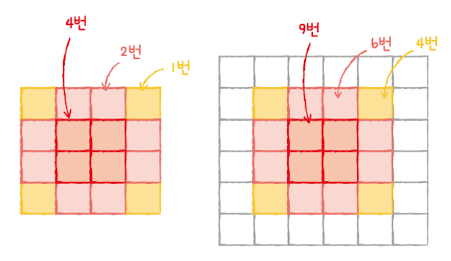

패딩을 하는 이유


*   패딩을 하지 않았을 경우 참여비율은 (4 : 1)이지만, 패딩을 1번하면 (9:4) , 2번하면 (1 : 1)이 된다.
*   적절한 패딩을 통해 이미지의 주변에 있는 정보를 잃어지지 않게 도와줌


In [4]:
keras.layers.Conv2D(10,kernel_size = (3,3),activation = 'relu', padding = 'same')

<Conv2D name=conv2d_1, built=False>

# **스트라이드(stride)**

합성곱 연산은 좌우, 위아래로 한 칸씩 이동하지만 두 칸씩도 가능하다.

칸의 이동이 커지면 -> 특성 맵의 크기는 작아짐(도장 찍는 횟수가 줄어들기 때문)

즉, 이러한 이동의 크기를 **스트라이드**라고 한다.

In [5]:
keras.layers.Conv2D(10,kernel_size = (3,3),activation = 'relu', padding = 'same',strides = 1)

<Conv2D name=conv2d_2, built=False>

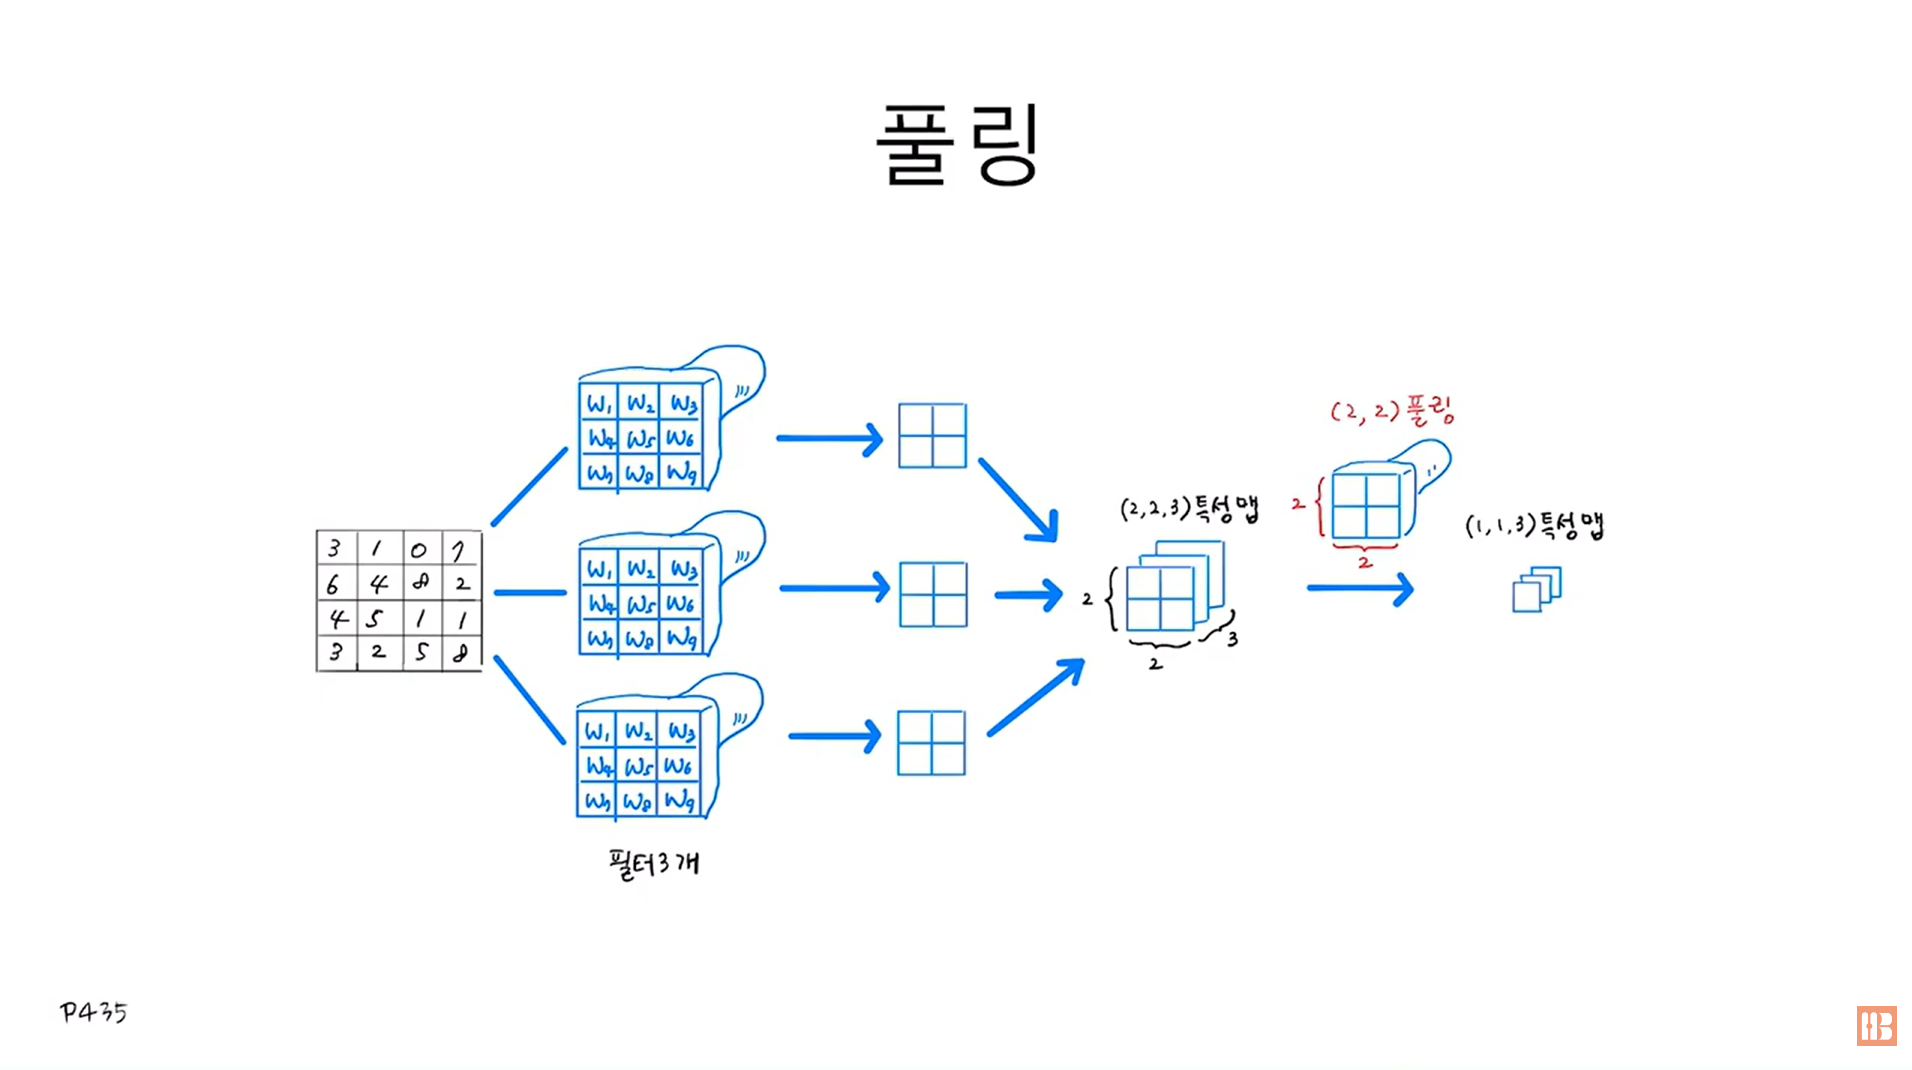

# **풀링(pooling)**

풀링은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행한다.

특성맵의 개수는 줄어들지 않는다.

ex)
(2,2,3) 크기의 특성 맵에 풀링 -> (1,1,3) 크기로 변환

풀링도 합성곱 처럼 입력 위를 지나가면서 도장을 찍는다.

위 그림에서는 (2,2) 크기로 풀링을 한다.

도장을 찍은 영역에서 가장 큰 값을 고르거나 평균값을 계산함


*   최대풀링(max pooling) - 가장 큰 값
*   평균 풀링(average pooling) - 평균 값



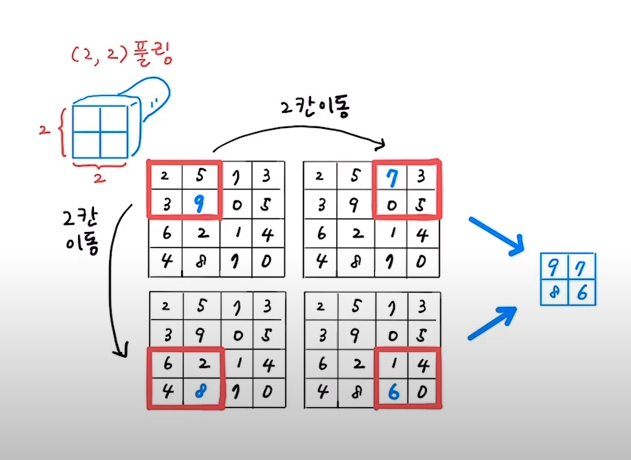

(4,4) 특성 맵이 있을 때

(2,2) 최대 풀링을 하면 절반으로 크기가 줄어듬

풀링의 경우 커널이 겹치지 않게 해야하기 때문에 (2,2)경우 스트라이드가 2가 된다.

In [6]:
keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid')

<MaxPooling2D name=max_pooling2d, built=False>

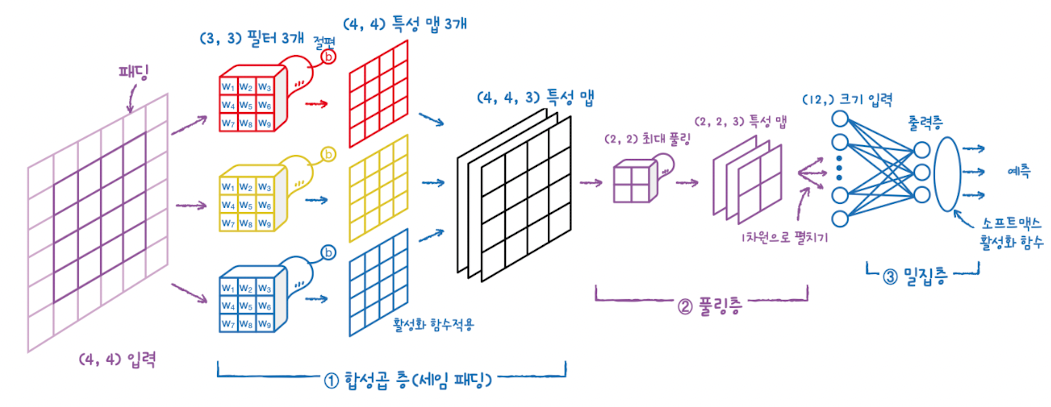

합성곱 신경망의 구조는 위와 같다.


1.   합성곱 층(커널 (3,3) / 세임 패딩 / 필터 3개 각각(3,3)크기 가중치에 필터마다 절편 하나)
2.   풀링 층(특성 맵에서 가로 세로 줄임(2,2) 풀링 / 특성 맵의 개수는 변하지 x)

*성능면 : 스트라이드 크게해서 맵 줄이기 <<< 풀링 층에서 크기 줄이기







---



# **컬러 이미지를 사용한 합성곱**

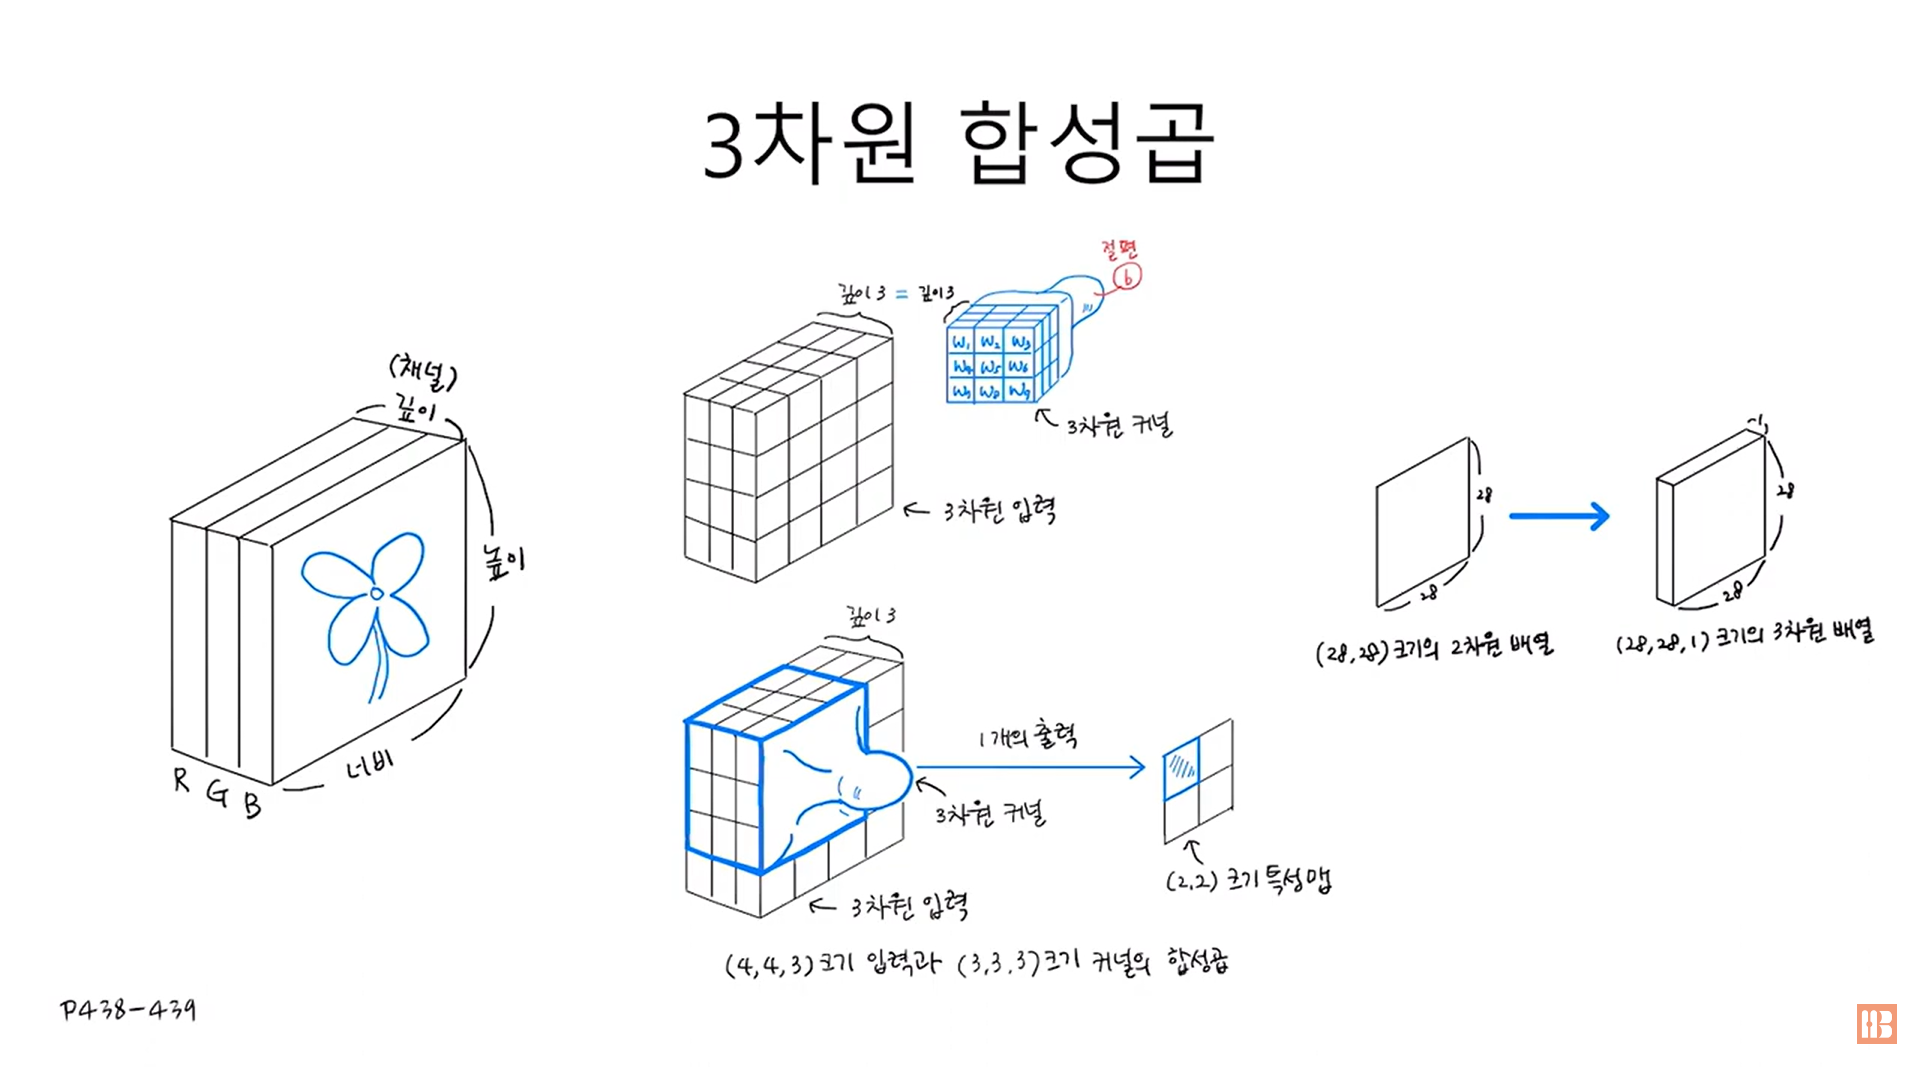

예제의 입력은 (4,4,3)크기 -> 커널의 크기도 (3,3,3)

합성곱의 계산은 (3,3,3)영역에 헤당하는 27개 원소에 27개의 가중치 곱하고 절편 더하는 식

MNIST의 흑백 데이터의 경우 28 x 28 크기 이미지 데이터를 받는데
그러면 (28,28,1) 크기의 3차원 배열로 변환한다.

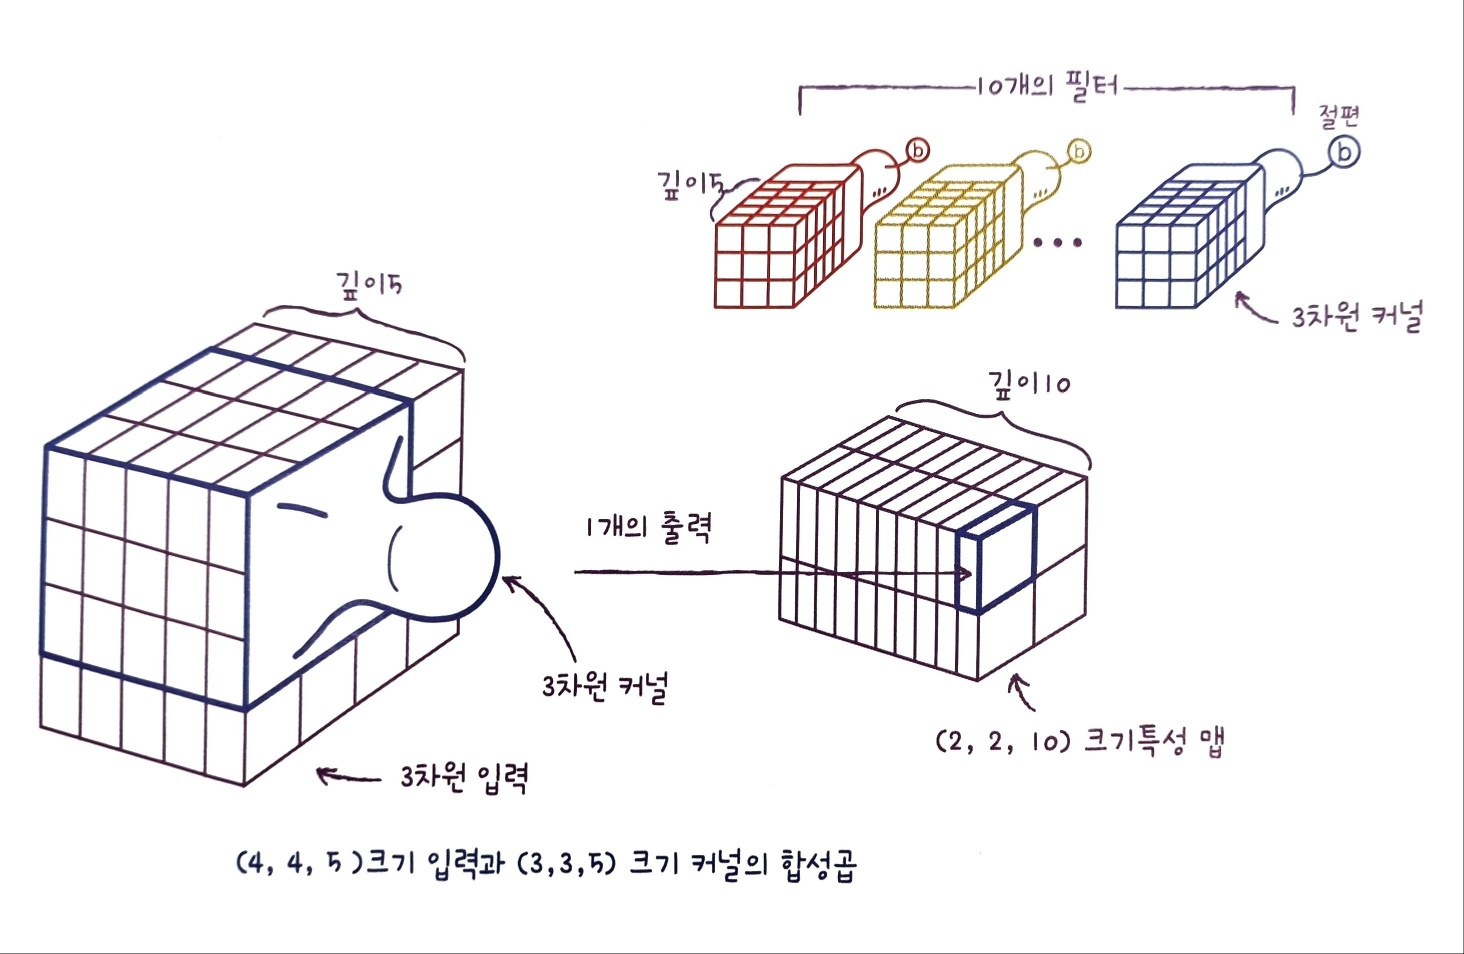

합성곱 층 - 풀링 층 다음에 다시 합성곱 층이 올 때

첫 번째 합성곱 층의 필터 개수가 5개라고 가정하면 첫 번째 풀링 층을 통과한 특성 맵의 크기가 (4,4,5)라고 해보자

두 번째 합성곱 층의 필터의 너비와 높이가 각각3이라면 필터의 커널 크기는 (3,3,5)가 된다

입력의 깊이 == 필터의 깊이

(3 x 3 x 5 = 45개의 가중치를 더하고 절편을 더한) 결과는 1개의 출력을 만든다.

두 번째 합성곱 층 필터 개수가 10개라면 만들어진 특성 맵의 크기는 (2,2,10)이 된다

즉, 합성곱 신경망은 너비와 높이는 점점 줄어들고 깊이는 점점 깊어지는 특징이다.

그리고 마지막에 출력층 전에 특성 맵을 모두 펼쳐서 밀집층의 입력으로 사용한다.